In [72]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.layers import Dense

from sklearn.metrics import roc_curve, roc_auc_score

In [143]:
import GPUtil
GPUtil.showUtilization()

| ID | GPU | MEM |
------------------
|  0 | 11% | 84% |
|  1 | 20% | 30% |
|  2 | 20% | 30% |
|  3 | 20% | 35% |


In [3]:
devices = tf.config.list_physical_devices()
devices

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU')]

In [4]:
#tf.config.experimental.set_virtual_device_configuration(devices[4], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)]) #in MB
# memory_limit=1024


In [4]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [64]:
def plot_rocs(models, epochs, X_test, y_test):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

    for i in range(len(epochs)):
        scores = models[i].predict(X_test)

        print("Average Normal Score: {0}".format(np.mean(scores[0:n])))
        print("Average Anomaly Score: {0}".format(np.mean(scores[n:])))

        fpr_sup, tpr_sup, _ = roc_curve(Y_test, scores)
        ax1.set_title("ROC Curve")
        ax1.plot(fpr_sup, tpr_sup, 'x', label="epochs = {0}".format(epochs[i]))
        ax1.legend()

        ax2.set_title("Score Bins")
        ax2.hist(scores, histtype="step", label="epochs = {0}".format(epochs[i]))
        ax2.legend()
    plt.show()

def plot_roc(models, epochs):
    
    for i in range(len(epochs)):
        scores = models[i].predict(X_test1)
        fpr_sup, tpr_sup, _ = roc_curve(Y_test, scores)
        plt.plot(fpr_sup, tpr_sup, label="epochs = {0}".format(epochs[i]))
    
    for i in range(len(epochs)):
        scores = models[i].predict(X_test2)
        fpr_sup, tpr_sup, _ = roc_curve(Y_test, scores)
        plt.plot(fpr_sup, tpr_sup, label="epochs = {0}".format(epochs[i]))
        
    plt.ylabel("true positive rate")
    plt.xlabel("false positive rate")
    plt.legend()
    

def plot_functions(models, epochs):
    x = np.linspace(-10,10,50)
    for i in range(len(epochs)):
        y = models[i].predict(x)
        plt.plot(x,y, label="epoch {0}".format(epochs[i]))
    plt.hist(X_train,density=True,histtype="step",label="training data")
    plt.hist(anom_test,density=True,histtype="step",label="anomalous data")
    plt.legend()
    plt.ylabel("Activation")
    
def train_networks(model, epochs):
    models = []
    histories = []
    for epoch in epochs:
        model_temp, history = model(X_train, Y_train, epoch)
        models.append(model_temp)
        histories.append(history)
    return models, histories

def get_params(perceptrons):
    biases = []
    weights = []
    for i in range(len(epochs)):
        weights.append(perceptrons[i].weights[0])
        biases.append(perceptrons[i].weights[1])
    return weights, biases

In [144]:
# Build toy data
var = 1
mu1 = -2
mu2 = mu1+2
mu3 = mu1-2
n = 1000

X_train = np.random.normal(mu1, var, size=(n))
Y_train = np.zeros(n)

norm_test = np.random.normal(mu1, var, size=(n))
anom_test1 = np.random.normal(mu2, var, size=(n))
anom_test2 = np.random.normal(mu3, var, size=(n))
anom_test3 = np.random.normal(-mu1, var, size=(n))

X_test1 = np.hstack((norm_test, anom_test1))
X_test2 = np.hstack((norm_test, anom_test2))
X_test3 = np.hstack((norm_test, anom_test3))

Y_test = np.ones(n)
Y_test = np.hstack((Y_train, Y_test))

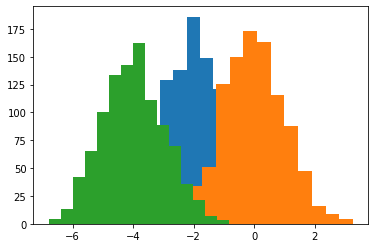

In [145]:
# visualize data
plt.hist(X_train,bins=15)
plt.hist(anom_test1,bins=15)
plt.hist(anom_test2,bins=15)
plt.show()

# Try single non-linear perceptron

In [112]:
from tensorflow.keras import initializers

In [113]:
def perceptron(X_train, Y_train, epochs):
    toy_model = Sequential()
    toy_model.add(Dense(1, input_dim=1, kernel_initializer='ones', bias_initializer='ones', activation='sigmoid'))
    
    toy_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    history = toy_model.fit(X_train, Y_train, epochs=epochs)
    return toy_model, history

In [114]:
epochs = [1,5,10, 25, 50]
perceptrons, histories = train_networks(perceptron, epochs)

32/32 [==============================] - 0s 2ms/step - loss: 0.0251 - accuracy: 1.0000
Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 0.0251 - accuracy: 1.0000
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 1.0000
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.0197 - accuracy: 1.0000
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 1.0000
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.0163 - accuracy: 1.0000
Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 0.0251 - accuracy: 1.0000
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 1.0000
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 1.0000
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 1.0000
Epoch 5/10
32/32 [==================

# Toy Model Results

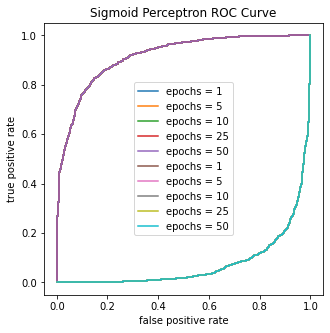

In [80]:
plt.figure(figsize=(5,5))
plot_roc(perceptrons, epochs)
plt.title("Sigmoid Perceptron ROC Curve")
plt.savefig("figures/sigmoid-perceptron-roc.png")

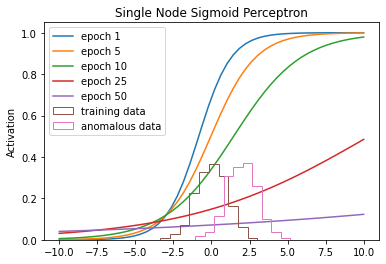

In [81]:
plot_functions(perceptrons, epochs)
plt.title("Single Node Sigmoid Perceptron")
plt.savefig("figures/sigmoid-perceptron-func.png")

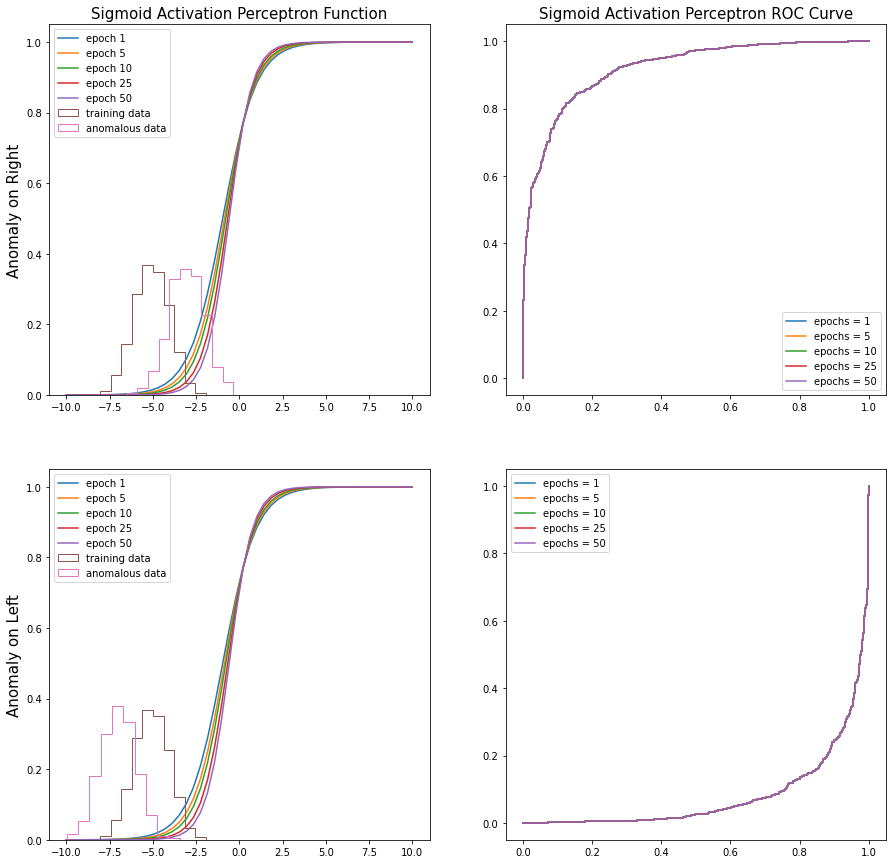

In [115]:
fig, axes = plt.subplots(2,2, figsize=(15,15))
    
x = np.linspace(-10,10,50)
for i in range(len(epochs)):
    y = perceptrons[i].predict(x)
    axes[0,0].plot(x,y, label="epoch {0}".format(epochs[i]))
    axes[1,0].plot(x,y, label="epoch {0}".format(epochs[i]))
    
    scores = perceptrons[i].predict(X_test1)
    fpr_sup, tpr_sup, _ = roc_curve(Y_test, scores)
    axes[0,1].plot(fpr_sup, tpr_sup, label="epochs = {0}".format(epochs[i]))
    
    scores = perceptrons[i].predict(X_test2)
    fpr_sup, tpr_sup, _ = roc_curve(Y_test, scores)
    axes[1,1].plot(fpr_sup, tpr_sup, label="epochs = {0}".format(epochs[i]))

axes[0,0].hist(X_train,density=True,histtype="step",label="training data")
axes[0,0].hist(anom_test1,density=True,histtype="step",label="anomalous data")
axes[0,0].set_ylabel("Anomaly on Right", fontsize=15)
        
axes[1,0].hist(X_train,density=True,histtype="step",label="training data")
axes[1,0].hist(anom_test2,density=True,histtype="step",label="anomalous data")
axes[1,0].set_ylabel("Anomaly on Left", fontsize=15)

axes[0,0].set_title("Sigmoid Activation Perceptron Function", fontsize=15)
axes[0,1].set_title("Sigmoid Activation Perceptron ROC Curve", fontsize=15)
axes = axes.flatten()
for ax in axes:
    ax.legend()

# Large Model Results

In [158]:
def multi_layer(hidden_layers=3, layer_size=128):
    toy_model = Sequential()
    toy_model.add(Dense(layer_size, input_dim=1, activation='relu'))
    
    for i in range(hidden_layers):
        toy_model.add(Dense(layer_size, activation='relu'))
        
    toy_model.add(Dense(1, activation='sigmoid'))
    toy_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    # history = toy_model.fit(X_train, Y_train, epochs=epochs)
    return toy_model


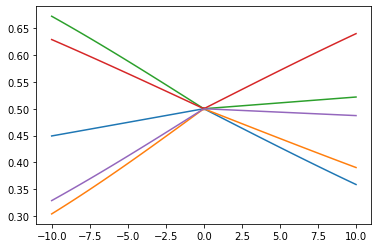

In [164]:
models = [multi_layer() for _ in range(5)]
x = np.linspace(-10,10,100)
for m in models:
    plt.plot(x, m(x))
plt.show()

In [183]:
def multi_layer_init_high(hidden_layers=3, layer_size=2):
    toy_model = Sequential()
    toy_model.add(Dense(layer_size, input_dim=1, activation='relu', kernel_initializer='ones', bias_initializer='zeros'))
    
    for i in range(hidden_layers):
        toy_model.add(Dense(layer_size, activation='relu', kernel_initializer='ones', bias_initializer='zeros'))
        
    toy_model.add(Dense(1, kernel_initializer='ones', bias_initializer='zeros', activation='sigmoid'))
    toy_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    #history = toy_model.fit(X_train, Y_train, epochs=epochs)
    return toy_model


# initialization options

1. pretrain on data that is all one
2. alpha + (1-alpha)* NN(x); initialize alpha at 1, let alpha be learnable

Second idea after initialization: standardize input data

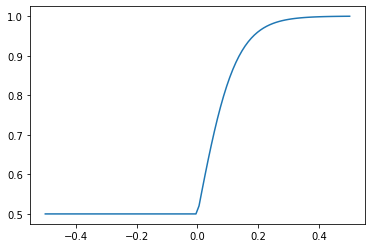

In [184]:
model = multi_layer_init_high()
x = np.linspace(-0.5,0.5,100)
plt.plot(x, model(x))

In [182]:
model(np.array([1e-9]))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

In [140]:
def multi_layer_reg(X_train, Y_train, epochs, hidden_layers=3, layer_size=128):
    toy_model = Sequential()
    toy_model.add(Dense(layer_size, input_dim=1, activation='relu', activity_regularizer=tf.keras.regularizers.L2(0.01)))
    
    for i in range(hidden_layers):
        toy_model.add(Dense(layer_size, activation='relu', activity_regularizer=tf.keras.regularizers.L2(0.01)))
        
    toy_model.add(Dense(1, activation='sigmoid'))
    toy_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    history = toy_model.fit(X_train, Y_train, epochs=epochs)
    return toy_model, history



In [146]:
epochs = [1,5,10,25,50]
multi_reg, histories = train_networks(multi_layer_reg, epochs)

32/32 [==============================] - 1s 3ms/step - loss: 0.5763 - accuracy: 1.0000
Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 0.6660 - accuracy: 0.9010
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.4754 - accuracy: 1.0000
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.3663 - accuracy: 1.0000
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.3002 - accuracy: 1.0000
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.2585 - accuracy: 1.0000
Epoch 1/10
32/32 [==============================] - 1s 3ms/step - loss: 0.6484 - accuracy: 0.9680
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.4802 - accuracy: 1.0000
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.3756 - accuracy: 1.0000
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.3082 - accuracy: 1.0000
Epoch 5/10
32/32 [==================

In [153]:
epochs = [1,5,10,25,50]
multi_layers_init, histories = train_networks(multi_layer_init_high, epochs)

32/32 [==============================] - 0s 3ms/step - loss: 1661079.5000 - accuracy: 0.9680
Epoch 1/5
32/32 [==============================] - 0s 3ms/step - loss: 680569.6875 - accuracy: 0.9680
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 1/10
32/32 [==============================] - 0s 3ms/step - loss: 516759.1562 - accuracy: 0.9680 
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy

32/32 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 40/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 41/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 42/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 43/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 44/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 45/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 46/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 47/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 48/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0000e+00 -

In [123]:
epochs = [1,5,10,25,50]
multi_layers, histories = train_networks(multi_layer, epochs)

32/32 [==============================] - 0s 3ms/step - loss: 0.6226 - accuracy: 0.9390
Epoch 1/5
32/32 [==============================] - 0s 3ms/step - loss: 0.5851 - accuracy: 1.0000
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.4229 - accuracy: 1.0000
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.2983 - accuracy: 1.0000
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.2052 - accuracy: 1.0000
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.1411 - accuracy: 1.0000
Epoch 1/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6021 - accuracy: 0.9840
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.4632 - accuracy: 1.0000
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.3486 - accuracy: 1.0000
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.2549 - accuracy: 1.0000
Epoch 5/10
32/32 [==================

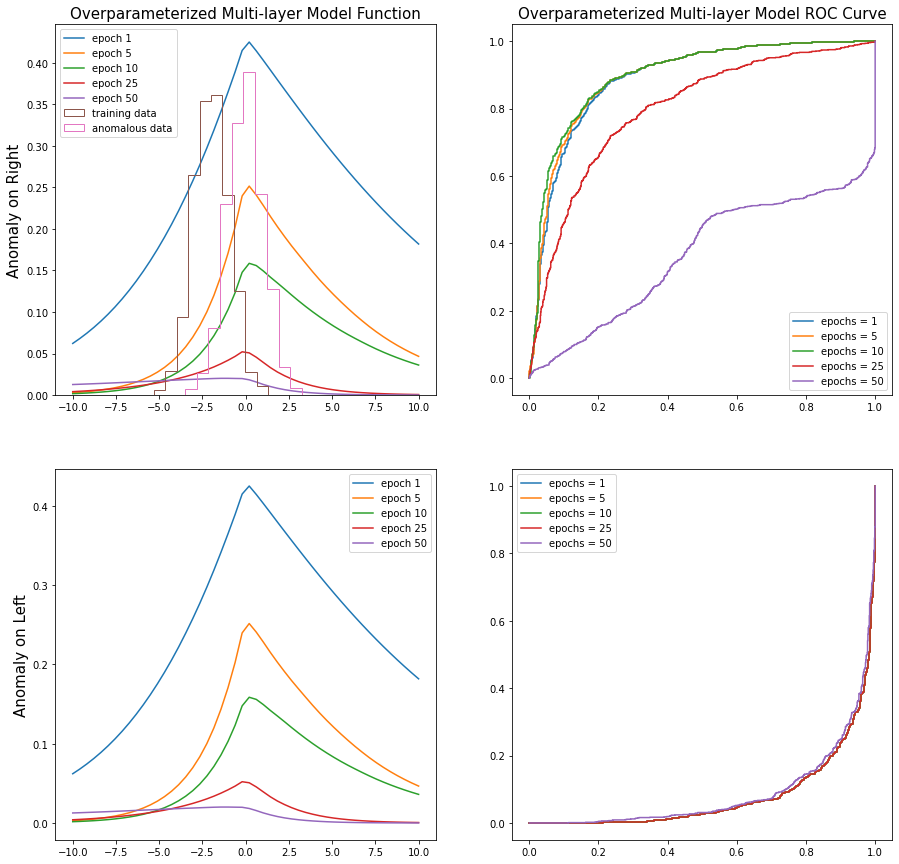

In [187]:
fig, axes = plt.subplots(2,2, figsize=(15,15))
    
x = np.linspace(-10,10,50)
for i in range(len(epochs)):
    y = multi_reg[i].predict(x)
    axes[0,0].plot(x,y, label="epoch {0}".format(epochs[i]))
    axes[1,0].plot(x,y, label="epoch {0}".format(epochs[i]))
    
    scores = multi_reg[i].predict(X_test1)
    fpr_sup, tpr_sup, _ = roc_curve(Y_test, scores)
    axes[0,1].plot(fpr_sup, tpr_sup, label="epochs = {0}".format(epochs[i]))
    
    scores = multi_reg[i].predict(X_test2)
    fpr_sup, tpr_sup, _ = roc_curve(Y_test, scores)
    axes[1,1].plot(fpr_sup, tpr_sup, label="epochs = {0}".format(epochs[i]))

axes[0,0].hist(X_train,density=True,histtype="step",label="training data")
axes[0,0].hist(anom_test1,density=True,histtype="step",label="anomalous data")
axes[0,0].set_ylabel("Anomaly on Right", fontsize=15)
        
#axes[1,0].hist(X_train,density=True,histtype="step",label="training data")
#axes[1,0].hist(anom_test2,density=True,histtype="step",label="anomalous data")
axes[1,0].set_ylabel("Anomaly on Left", fontsize=15)

axes[0,0].set_title("Overparameterized Multi-layer Model Function", fontsize=15)
axes[0,1].set_title("Overparameterized Multi-layer Model ROC Curve", fontsize=15)
axes = axes.flatten()
for ax in axes:
    ax.legend()

Average Normal Score: 0.07070552557706833
Average Anomaly Score: 0.4253133535385132
Average Normal Score: 0.009536299854516983
Average Anomaly Score: 0.2907227873802185
Average Normal Score: 0.003157289931550622
Average Anomaly Score: 0.3555562198162079
Average Normal Score: 0.0010083732195198536
Average Anomaly Score: 0.2830900251865387


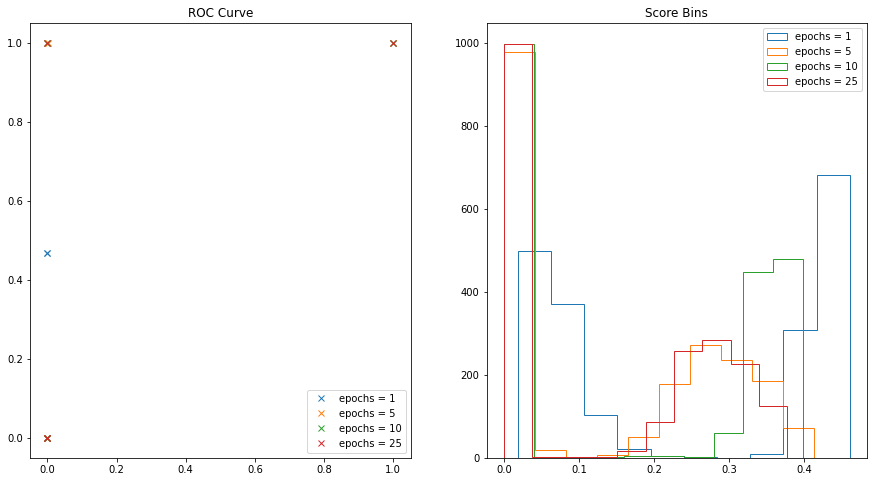

In [70]:
plot_rocs(multi_layers, epochs, X_test, Y_test)

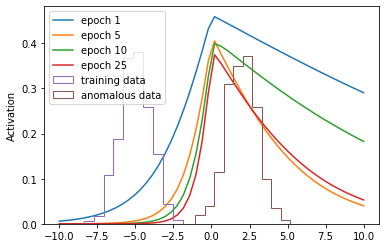

In [71]:
plot_functions(multi_layers, epochs)

# Negative Gaussian Activation

In [51]:
class BiasLayer(tf.keras.layers.Layer):
    def __init__(self, input_dim):
        super(BiasLayer, self).__init__()
        self.b = tf.Variable(initial_value=tf.zeros(1), trainable=True, name="Bias")

    def call(self, inputs):
        return inputs - self.b

In [53]:
def gaussian(x):
    return -np.e**(-x**2)+1
    
def gaussian_perceptron(X_train, Y_train, epochs):
    toy_model = Sequential()
    # toy_model.add(BiasLayer(1))
    toy_model.add(Dense(1, input_dim=1, use_bias=True, activation='linear'))
    toy_model.add(tf.keras.layers.Lambda(gaussian))
    toy_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = toy_model.fit(X_train, Y_train, epochs=epochs)
    return toy_model, history

def gaussian_model(X_train, Y_train, epochs, hidden_layers=4, layer_size=128):
    toy_model = Sequential()
    toy_model.add(Dense(layer_size, input_dim=1, activation='relu'))
    
    for i in range(hidden_layers):
        toy_model.add(Dense(layer_size, activation='relu'))
    toy_model.add(Dense(1))
    toy_model.add(tf.keras.layers.Lambda(gaussian))
    toy_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    history = toy_model.fit(X_train, Y_train, epochs=epochs)
    return toy_model, history

In [54]:
epochs = [1,5,10,25]
gauss_perceptrons, histories = train_networks(gaussian_perceptron, epochs)
gauss_models, histories = train_networks(gaussian_model, epochs)

32/32 [==============================] - 0s 3ms/step - loss: 8.1597 - accuracy: 0.0000e+00
Epoch 1/5
32/32 [==============================] - 0s 3ms/step - loss: 15.0866 - accuracy: 0.0000e+00
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 15.0436 - accuracy: 0.0000e+00
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 14.9796 - accuracy: 0.0000e+00
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 14.8792 - accuracy: 0.0000e+00
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 14.7237 - accuracy: 0.0000e+00
Epoch 1/10
32/32 [==============================] - 0s 3ms/step - loss: 4.5159 - accuracy: 0.0010
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 3.7439 - accuracy: 0.0030
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 3.0723 - accuracy: 0.0060
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 2.4979 - accuracy: 0.0130
Epoch 5

Average Normal Score: 4.172325152040912e-09
Average Anomaly Score: 0.0017257098807021976
Average Normal Score: 4.6415329961746465e-06
Average Anomaly Score: 0.0017880117520689964
Average Normal Score: 8.54331210575765e-06
Average Anomaly Score: 2.3054779376252554e-05
Average Normal Score: 3.055155275433208e-06
Average Anomaly Score: 1.347708712273743e-05


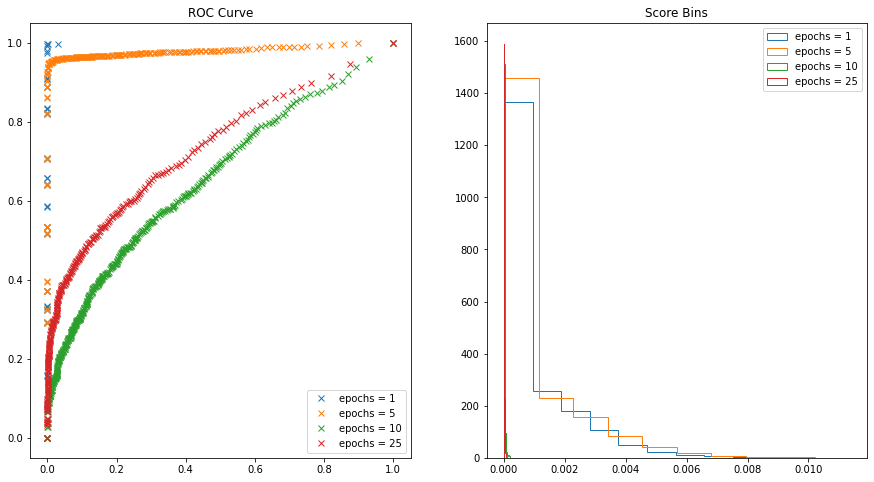

In [55]:
plot_rocs(gauss_models, epochs, X_test, Y_test)

In [56]:
def get_params(perceptrons):
    biases = np.zeros(len(perceptrons))
    weights = np.zeros(len(perceptrons))
    for i in range(len(perceptrons)):
        weights[i] = perceptrons[i].weights[0]
        biases[i] = perceptrons[i].weights[1]
    return weights, biases

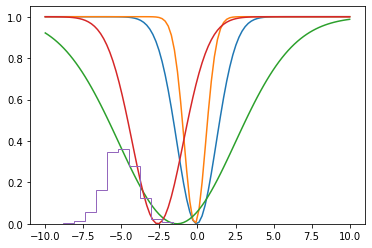

In [57]:
def plot_functions2(models, epochs):
    x = np.linspace(-10,10,100)
    for i in range(0, len(epochs)):
        y = models[i].predict(x)
        plt.plot(x,y)
    plt.hist(X_train,density=True, histtype="step")
    #plt.hist(anom_test, density=True, histtype='step')

plot_functions2(gauss_perceptrons, epochs)
plt.show()

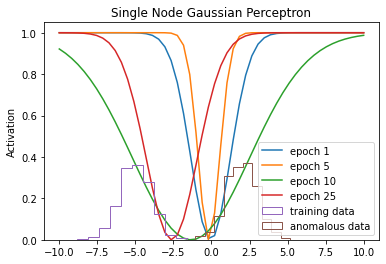

In [58]:
plot_functions(gauss_perceptrons, epochs)
plt.title("Single Node Gaussian Perceptron")
plt.savefig("figures/gaussian-perceptron-func.png")

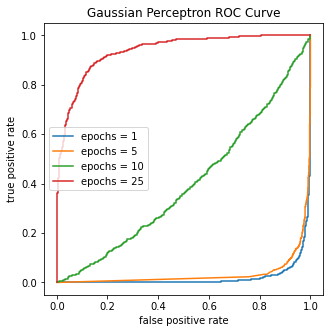

In [59]:
plt.figure(figsize=(5,5))
plot_roc(gauss_perceptrons, epochs)
plt.title("Gaussian Perceptron ROC Curve")
plt.savefig("figures/gaussian-perceptron-roc.png")

In [60]:
weights, biases = get_params(gauss_perceptrons)

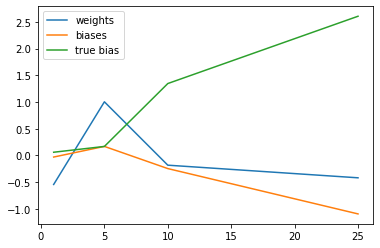

In [61]:
plt.plot(epochs, weights, label="weights")
plt.plot(epochs, biases, label="biases")
plt.plot(epochs, biases/weights, label = "true bias")
#plt.xscale('log')
plt.legend()
plt.show()

# Large Gaussian Model

Average Normal Score: 0.015301952138543129
Average Anomaly Score: 0.02636045776307583
Average Normal Score: 0.008253876119852066
Average Anomaly Score: 0.10882501304149628
Average Normal Score: 0.008230089209973812
Average Anomaly Score: 0.03002190589904785
Average Normal Score: 4.863911817665212e-05
Average Anomaly Score: 0.002965508960187435
Average Normal Score: 5.626678500902926e-08
Average Anomaly Score: 6.04987135943702e-08


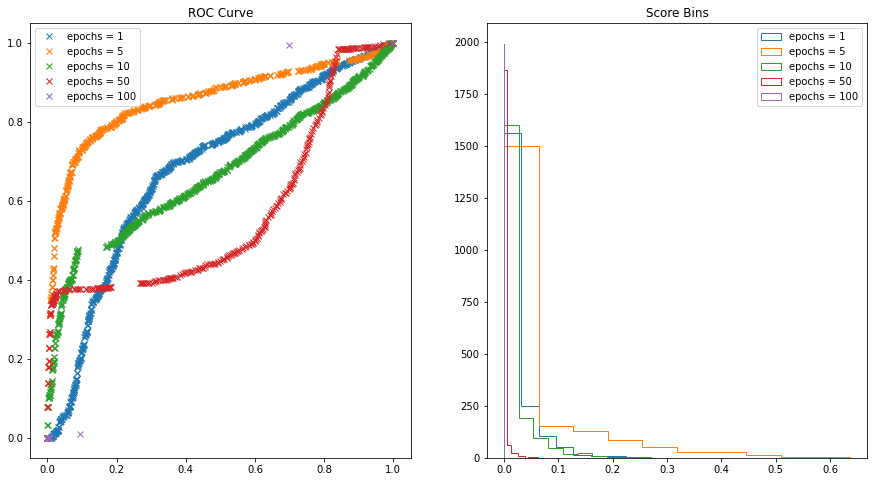

In [19]:
plot_rocs(gauss_models, epochs, X_test, Y_test)

# Idea to think about

1. Building more interesting loss functions that don't cause the models to generalize to 0
2. penalize zeros where training data is not

# Graphs to make
1. Roc curve that has sliding gaussians (gaussians same distance apart)
2. Roc curve that has gaussians varying distance (one centered at zero)

model_1: sigmoid with 4 node hidden layer\
model_2: gaussian activation

In [41]:
# Set up models
def toy_sigmoid():
    toy_model = Sequential()
    # toy_model.add(Dense(8, input_dim=1, activation='relu'))
    # toy_model.add(Dense(8, input_dim=1, activation='relu'))
    toy_model.add(Dense(1, input_dim=1, kernel_initializer='ones', bias_initializer='ones', activation='sigmoid'))
    toy_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return toy_model

def gaussian_perceptron():
    def gaussian(x):
        return -np.e**(-x**2)+1
    toy_model = Sequential()
    toy_model.add(Dense(1, input_dim=1))
    toy_model.add(tf.keras.layers.Lambda(gaussian))
    toy_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return toy_model

def generate_data(mu1, mu2, var, n):
    X_train = np.random.normal(mu1, var, size=(n))
    Y_train = np.zeros(n)

    norm_test = np.random.normal(mu1, var, size=(n))
    anom_test = np.random.normal(mu2, var, size=(n))
    X_test = np.hstack((norm_test, anom_test))
    Y_test = np.ones(n)
    Y_test = np.hstack((Y_train, Y_test))
    
    return X_train, Y_train, X_test, Y_test

def plot_roc(ax, scores, Y_true, label):
    fpr_sup, tpr_sup, _ = roc_curve(Y_true, scores)
    ax.plot(fpr_sup, tpr_sup, label=label)

In [42]:
# Sliding gaussians
var = 1
mu1s = np.arange(-10,10,2)
mu2s = mu1s - 2
n = 1000

Y_tests = []
model_1_test_scores = []
model_2_test_scores = []

for i in range(len(mu1s)):
    mu1 = mu1s[i]
    mu2 = mu2s[i]
    X_train, Y_train, X_test, Y_test = generate_data(mu1, mu2, var, n)
    model_1 = toy_sigmoid()
    model_2 = gaussian_perceptron()
    model_1.fit(X_train, Y_train, epochs=5)
    model_2.fit(X_train, Y_train, epochs=5)
    
    model_1_test_scores.append(model_1(X_test))
    model_2_test_scores.append(model_2(X_test))
    Y_tests.append(Y_test)

Epoch 1/5
32/32 [==============================] - 0s 4ms/step - loss: 1.9226e-04 - accuracy: 1.0000
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 1.9128e-04 - accuracy: 1.0000
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 1.9032e-04 - accuracy: 1.0000
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 1.8937e-04 - accuracy: 1.0000
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 1.8842e-04 - accuracy: 1.0000
Epoch 1/5
32/32 [==============================] - 0s 5ms/step - loss: 15.2492 - accuracy: 0.0000e+00
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 15.2492 - accuracy: 0.0000e+00
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 15.2492 - accuracy: 0.0000e+00
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 15.2492 - accuracy: 0.0000e+00
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 15.2492 - accura

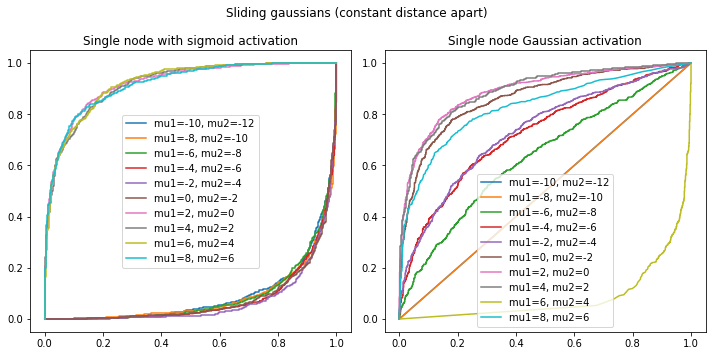

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

plt.suptitle("Sliding gaussians (constant distance apart)")

axes = axes.flatten()
(ax1, ax2) = axes

ax1.set_title("Single node with sigmoid activation")
ax2.set_title("Single node Gaussian activation")

for i in range(len(mu1s)):
    mu1 = mu1s[i]
    mu2 = mu2s[i]
    plot_roc(ax1, model_1_test_scores[i], Y_tests[i], "mu1={0}, mu2={1}".format(mu1, mu2))
    plot_roc(ax2, model_2_test_scores[i], Y_tests[i], "mu1={0}, mu2={1}".format(mu1, mu2))
    
for ax in axes:
    ax.legend()
plt.tight_layout()
plt.show()

# Variable anomaly gaussian

In [101]:
# plot functions with the moving gaussians
# Take a look at the gaussian model in regards to bias
# move background relative to signal (models)

var = 1
mu1 = 0
mu2s = np.arange(-10,10,2)
n = 1000

Y_tests = []
model_1_test_scores = []
model_2_test_scores = []

for i in range(len(mu2s)):
    mu1 = 0
    mu2 = mu2s[i]
    X_train, Y_train, X_test, Y_test = generate_data(mu1, mu2, var, n)
    model_1 = toy_sigmoid()
    model_2 = gaussian_perceptron()
    model_1.fit(X_train, Y_train, epochs=5)
    model_2.fit(X_train, Y_train, epochs=5)
    
    model_1_test_scores.append(model_1(X_test))
    model_2_test_scores.append(model_2(X_test))
    Y_tests.append(Y_test)

Epoch 1/5
32/32 [==============================] - 0s 616us/step - loss: 1.3503 - accuracy: 0.1940
Epoch 2/5
32/32 [==============================] - 0s 634us/step - loss: 1.1964 - accuracy: 0.2420
Epoch 3/5
32/32 [==============================] - 0s 438us/step - loss: 1.0581 - accuracy: 0.2930
Epoch 4/5
32/32 [==============================] - 0s 448us/step - loss: 0.9345 - accuracy: 0.3560
Epoch 5/5
32/32 [==============================] - 0s 428us/step - loss: 0.8274 - accuracy: 0.4240
Epoch 1/5
32/32 [==============================] - 0s 568us/step - loss: 0.0670 - accuracy: 0.9980
Epoch 2/5
32/32 [==============================] - 0s 738us/step - loss: 0.0167 - accuracy: 1.0000
Epoch 3/5
32/32 [==============================] - 0s 520us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 4/5
32/32 [==============================] - 0s 513us/step - loss: 9.9292e-04 - accuracy: 1.0000
Epoch 5/5
32/32 [==============================] - 0s 505us/step - loss: 2.3719e-04 - accuracy: 1.0000
Ep

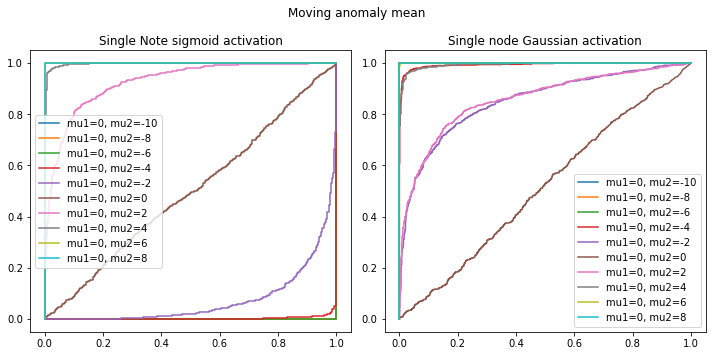

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

plt.suptitle("Moving anomaly mean")

axes = axes.flatten()
(ax1, ax2) = axes

ax1.set_title("Single Node sigmoid activation")
ax2.set_title("Single node Gaussian activation")

for i in range(len(mu1s)):
    mu1 = 0
    mu2 = mu2s[i]
    plot_roc(ax1, model_1_test_scores[i], Y_tests[i], "mu1={0}, mu2={1}".format(mu1, mu2))
    plot_roc(ax2, model_2_test_scores[i], Y_tests[i], "mu1={0}, mu2={1}".format(mu1, mu2))
    
for ax in axes:
    ax.legend()
plt.tight_layout()
plt.show()